<img src="https://www.godfrey.com/-/media/godfrey/insights/pr/7-ways-to-refresh-your-b2b-pr-program/brads-isometric-3d-extrude-inset-p1-01.gif"/>

# IA for HumanForYou - Projet IA A4
***



L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

    - Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.
    - Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.
    - Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à nous, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over
et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.




## Énoncé du problème


*Quels sont les facteurs responsables de l'attrition des employés de l'entreprise  ? En effectuant une analyse exploratoire des données (AED), nous pouvons trouver comment chaque caractéristique est responsable de l'attrition des employés de l'entreprise, puis en concevant des modèles ML, trouver la probabilité des caractéristiques pour l'attrition.*

## Objective


*Nous devons modéliser la probabilité d'attrition à l'aide d'algorithme . Les résultats ainsi obtenus seront utilisés par la direction pour comprendre quels changements elle devrait apporter à son lieu de travail, afin d'inciter la plupart de ses employés à rester.*

## Data

Données fournies dans 5 fichiers CSV différents

    -general_data.csv ==> Employee Information
    -employee_survey_data.csv ==> Employee - Job survey
    -manager_survey_data.csv ==> Manager -Employee Suvey
    -Intime.csv ==> Employee Intime Details
    -OutTime.csv ==> Employee OutTime Details






# Étape 1: Obtention et importation des Données 
***

En vue de pouvoir exploiter les données, nous les avons traité separément dans des notebooks et nous les avons enregistrés dans des fichiers CSV pour pouvoir les charger facilement ici : 

In [1]:
# ====== Importation des modules nécessaires à la manipulation des données et à la représentation visuelle. ========

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler

In [2]:
# ====== Chargement des fichiers csv =========
general_data = pd.read_csv(r"C:\Users\lamine ould's\Desktop\CESI-HumanFroYou-main\data_set_filter\general_data_dummies.csv")
employee_survey_data = pd.read_csv(r"C:\Users\lamine ould's\Desktop\CESI-HumanFroYou-main\data_set_filter/employee.csv")
manager = pd.read_csv(r"C:\Users\lamine ould's\Desktop\CESI-HumanFroYou-main\data_set_filter/manager_survey_data.csv")
time = pd.read_csv(r"C:\Users\lamine ould's\Desktop\CESI-HumanFroYou-main\data_set_filter/mean_working_h.csv")


# Étape 2: Nettoyage des données 
***

*Le prétraitement des données demande beaucoup de travail et peut être une procédure très fastidieuse.Durant cette étape nous tâcherons d'appliquer les bonnes pratiques afin de structurer et nettoyer notre jeu de données.
Pour ce faire nous avons traite les 5 data set dans des fichiers sépare pour facilite l'analyse statique pour ensuite les regroupe dans un seul et mème data set*
 

In [3]:
# ====== Prétraitement des données ===========
# Joindre les différentes DataFrames
df1 = pd.merge(general_data,employee_survey_data,on='EmployeeID')
df2 = pd.merge(manager,time,on='EmployeeID')
df = pd.merge(df1,df2,on='EmployeeID')
df

,Unnamed: 0_x_x,Age,Attrition,DistanceFromHome,Education,EmployeeID,EmployeeCount,Gender,JobLevel,MonthlyIncome,...,MaritalStatus_Married,MaritalStatus_Single,Unnamed: 0_y_x,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Unnamed: 0_x_y,average_m_rating,Unnamed: 0_y_y,MeanWorkingTime
0,0,51,0,6,2,1,1,1,1,131160,...,1,0,0,3.0,4.0,2.000000,0,3.0,0,7.363301
1,1,31,1,10,1,2,1,1,1,41890,...,0,1,1,3.0,2.0,4.000000,1,3.0,1,8.077671
2,2,32,0,17,4,3,1,0,4,193280,...,1,0,2,2.0,2.0,1.000000,2,3.0,2,7.110486
3,3,38,0,2,5,4,1,0,3,83210,...,1,0,3,4.0,4.0,3.000000,3,2.5,3,7.275869
4,4,32,0,10,1,5,1,0,1,23420,...,0,1,4,4.0,1.0,3.000000,4,3.0,4,8.011352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,42,0,5,4,4406,1,1,1,60290,...,0,1,4405,4.0,1.0,3.000000,4405,3.0,4405,8.670373
4406,4406,29,0,2,4,4407,1,0,1,26790,...,0,0,4406,4.0,4.0,3.000000,4406,2.5,4406,6.111096
4407,4407,25,0,25,2,4408,1,0,2,37020,...,1,0,4407,1.0,3.0,3.000000,4407,3.5,4407,7.955633
4408,4408,42,0,18,2,4409,1,0,1,23980,...,0,0,4408,4.0,1.0,3.000000,4408,2.5,4408,9.450508


In [4]:
# Suppression des colonnes en trop
df.drop("Unnamed: 0_x_x",axis=1,inplace=True)
df.drop("Unnamed: 0_x_y",axis=1,inplace=True)
df.drop("Unnamed: 0_y_x",axis=1,inplace=True)
df.drop("Unnamed: 0_y_y",axis=1,inplace=True)
df.drop("EmployeeID",axis=1,inplace=True)
df.drop("EmployeeCount",axis=1,inplace=True)

In [5]:
def percentage(predicted,len):
    summ = 0
    for i in predicted:
        if i == 1:
            summ += 1
    p = summ/ len * 100
    return p

In [6]:
#Visualiser s'il y a des valeurs manquantes dans notre jeu de données.
df.isna().sum()

Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Dir


# Étape 3 : Analyse et visualisation statiques des données   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


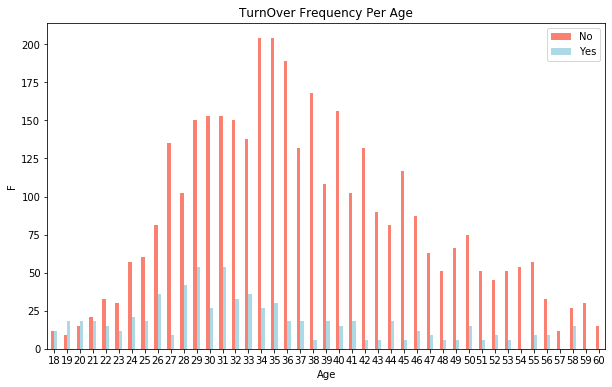

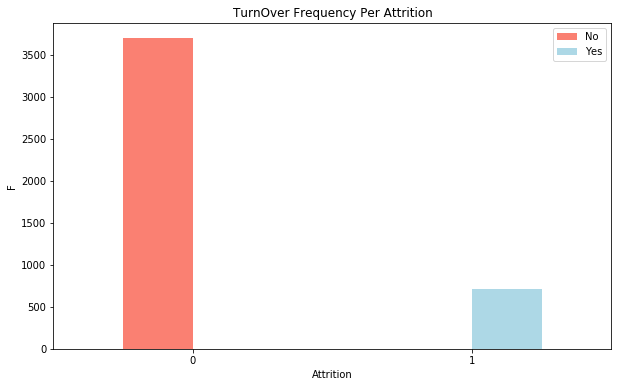

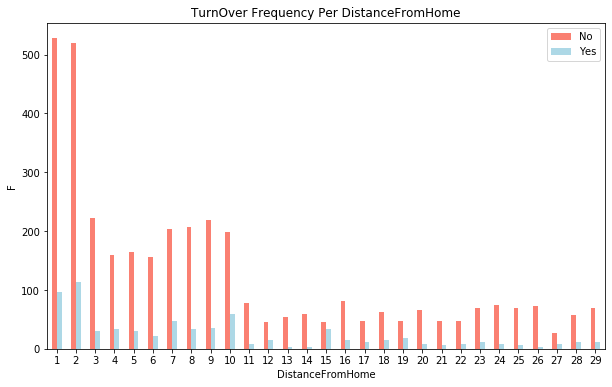

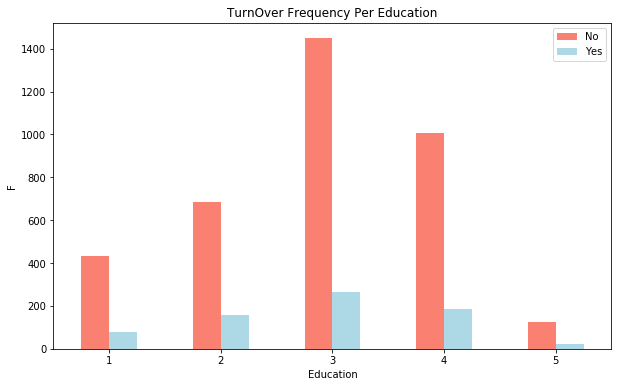

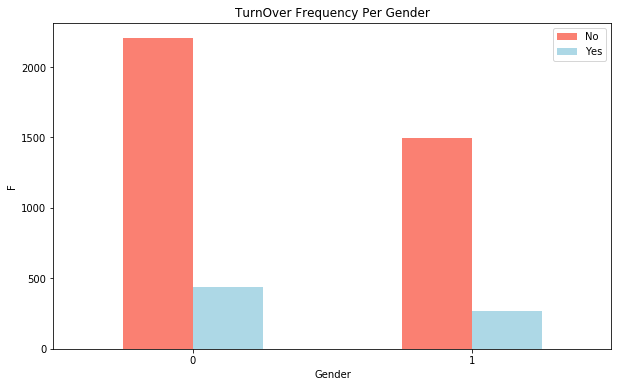

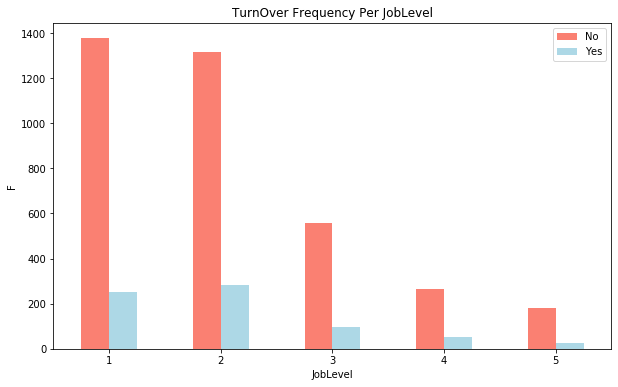

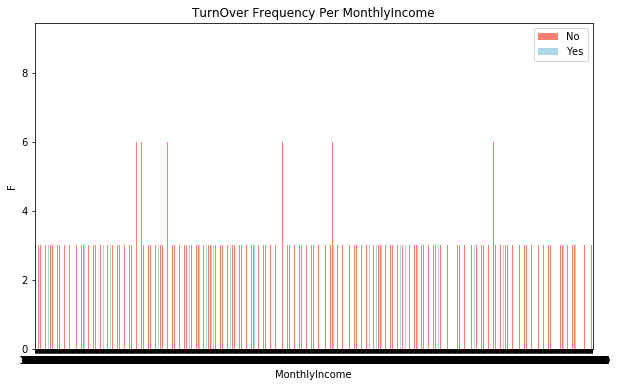

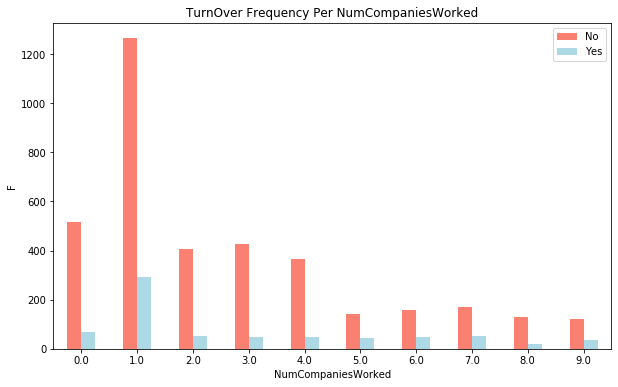

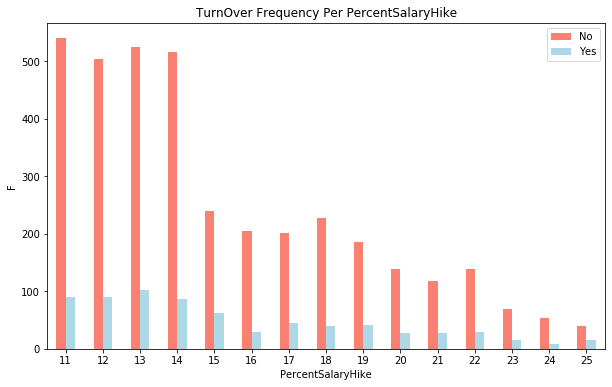

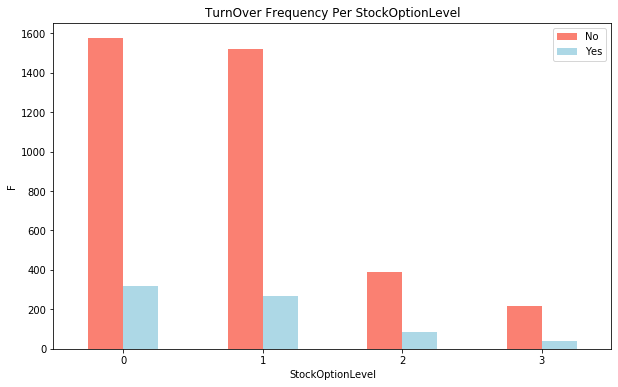

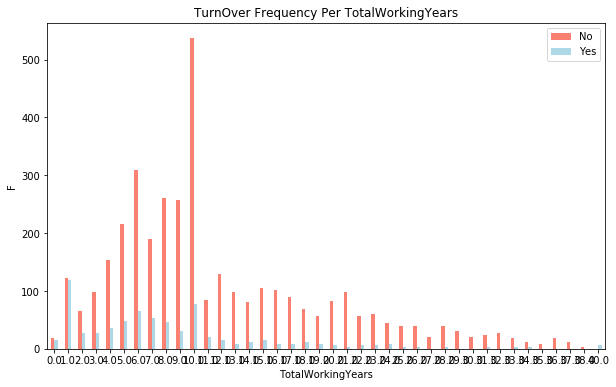

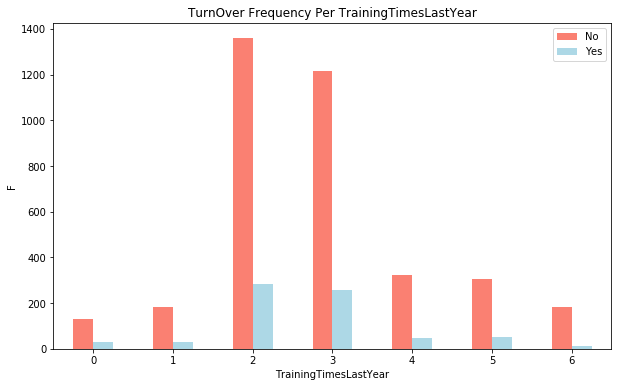

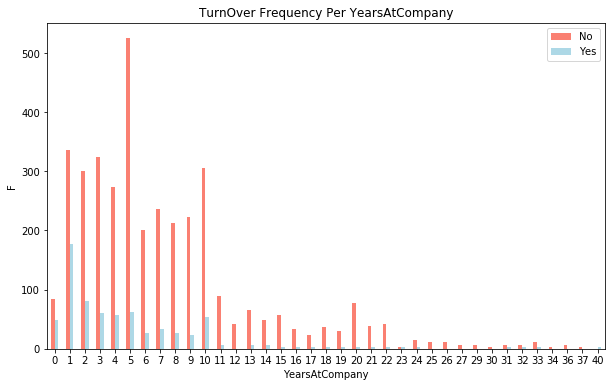

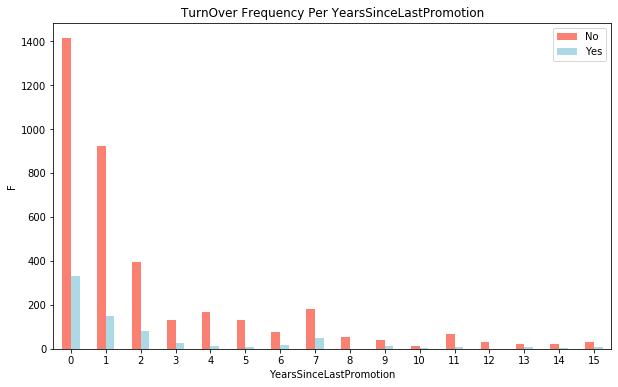

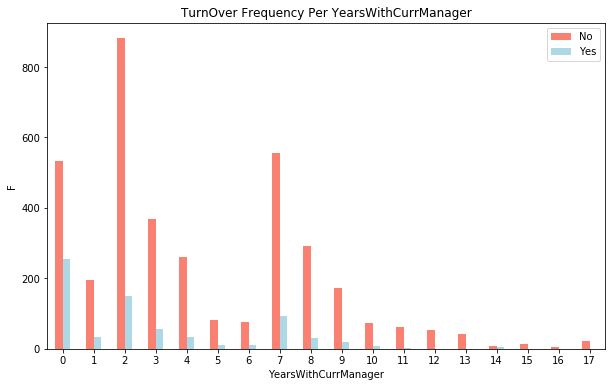

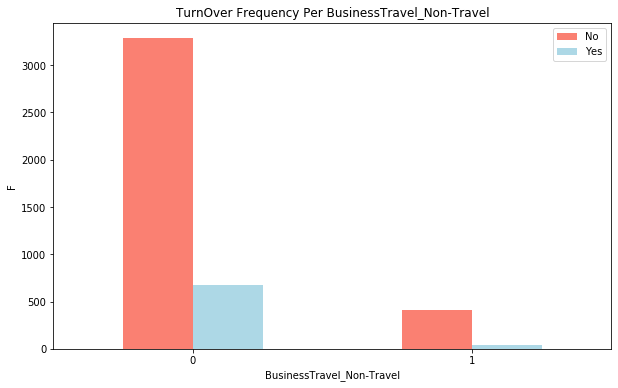

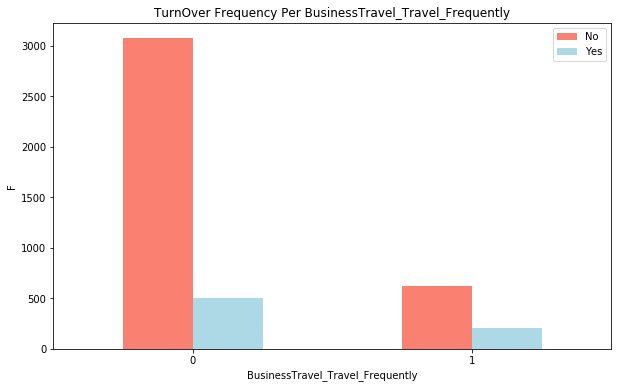

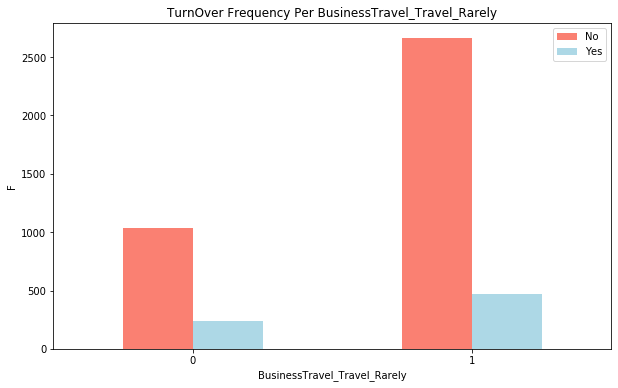

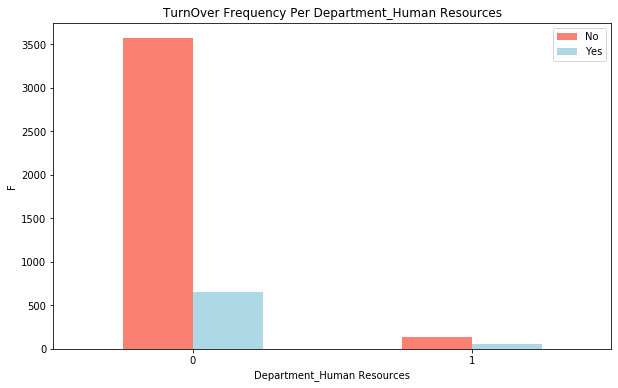

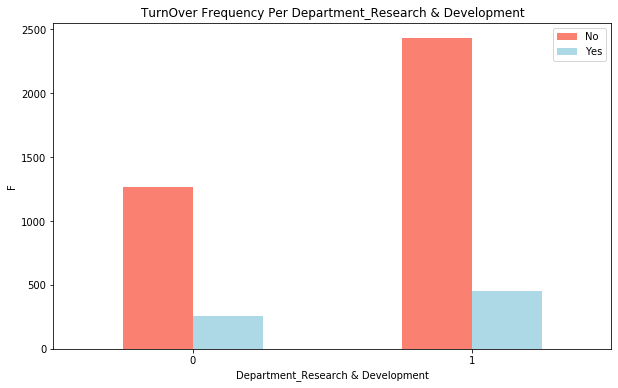

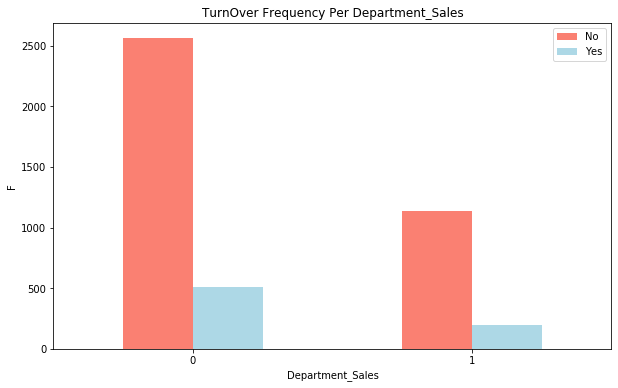

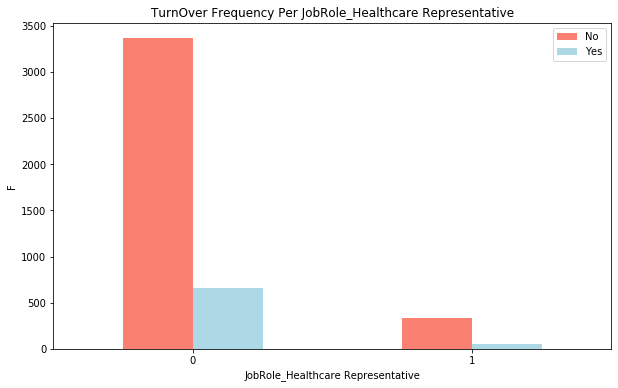

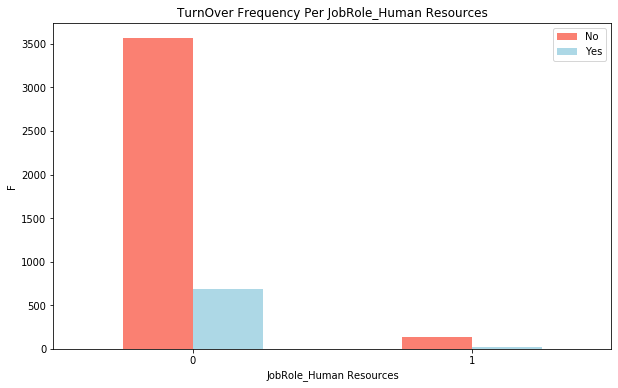

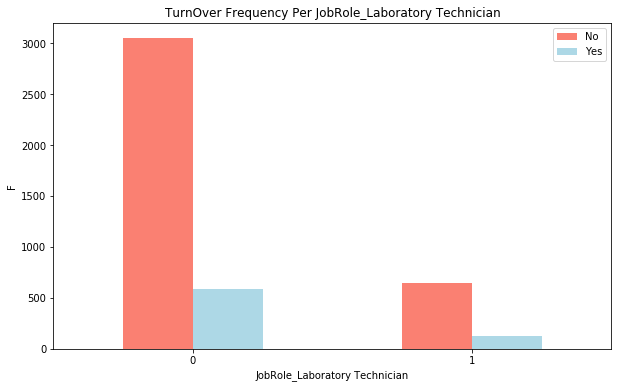

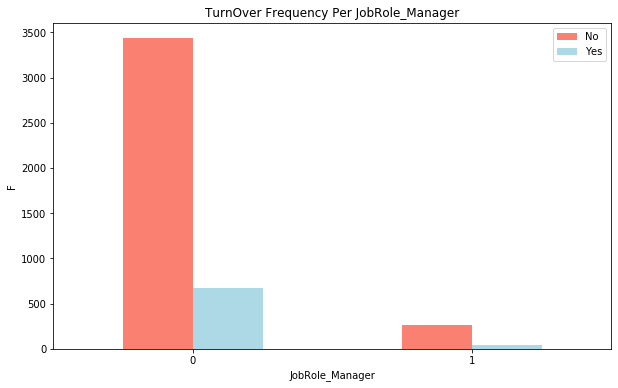

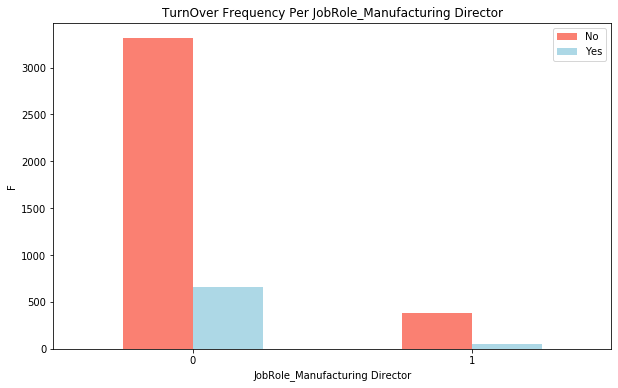

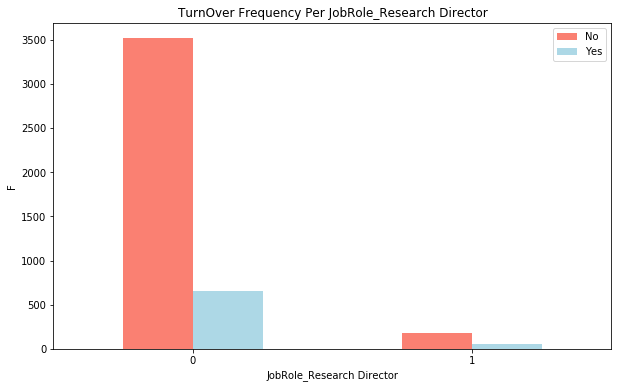

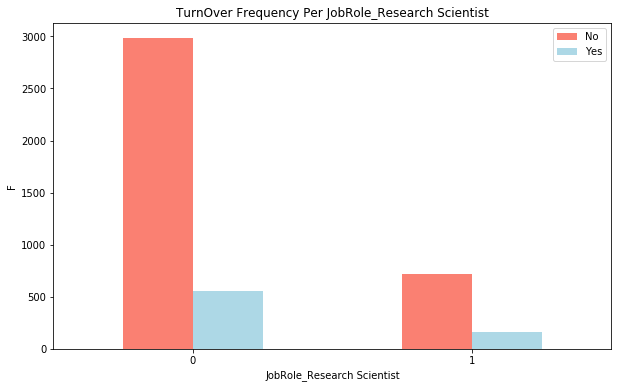

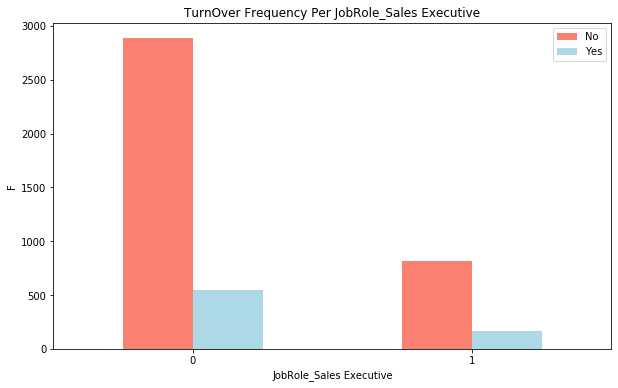

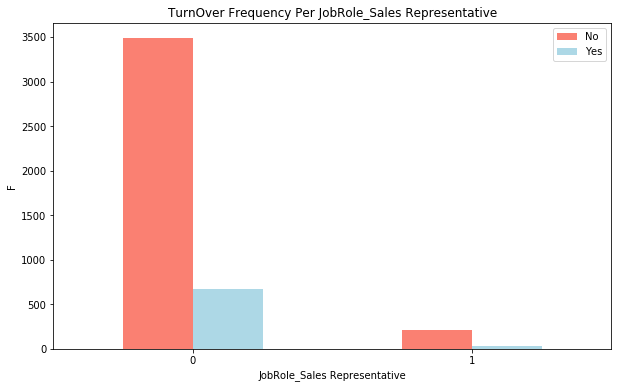

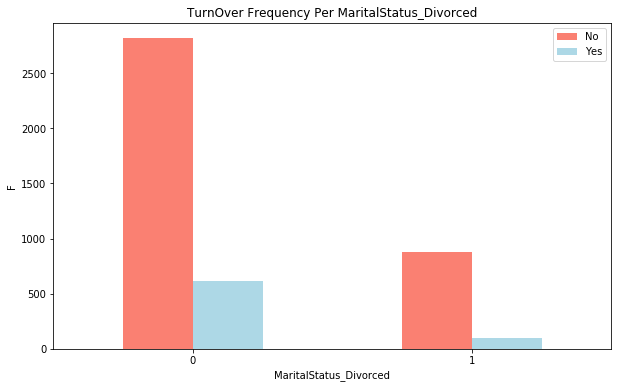

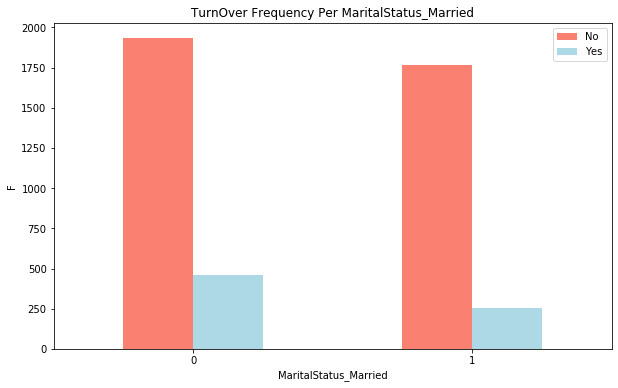

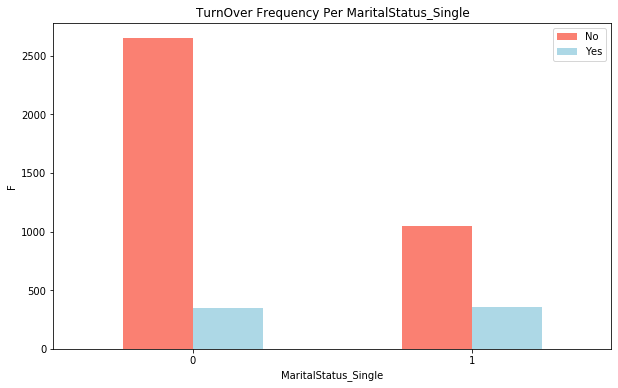

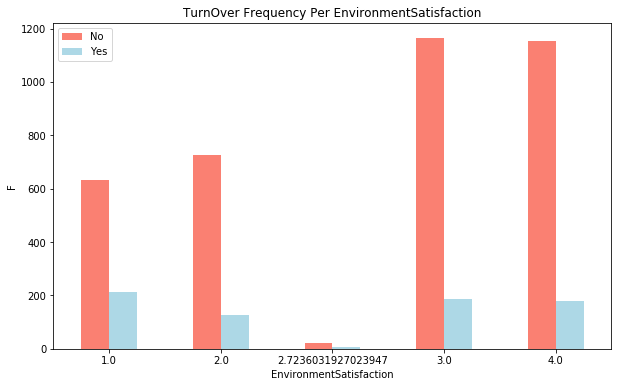

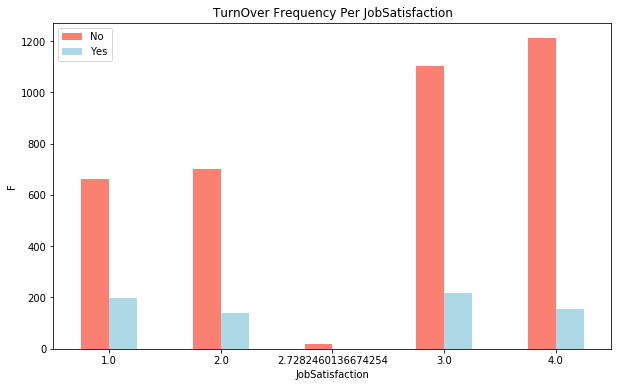

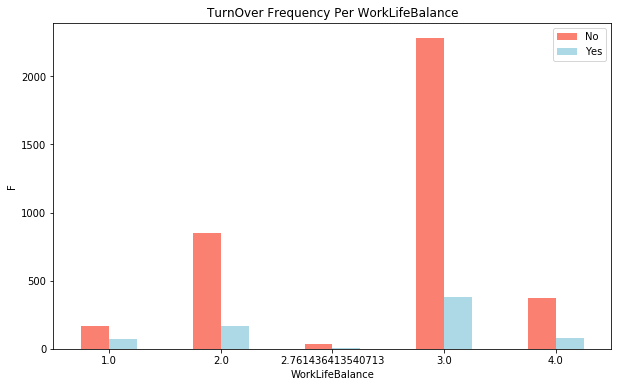

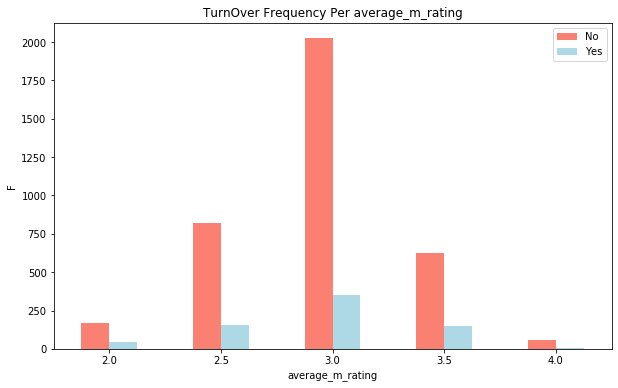

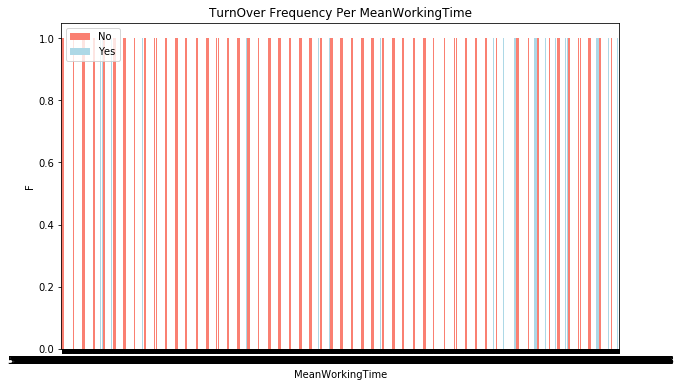

In [7]:
# Visualisation des relations entre chaque feature et la classe recherchée
for col in df.select_dtypes({'int64', 'float64','uint8'}) :
    pd.crosstab(df[col], df.Attrition).plot(kind="bar",
                                       figsize=(10, 6),
                                       color=["salmon", "lightblue"])

    # Plotter les graphes
    plt.title(f"TurnOver Frequency Per {col}")
    plt.xlabel(col)
    plt.ylabel("F")
    plt.legend(["No", "Yes"])
    plt.xticks(rotation=0);

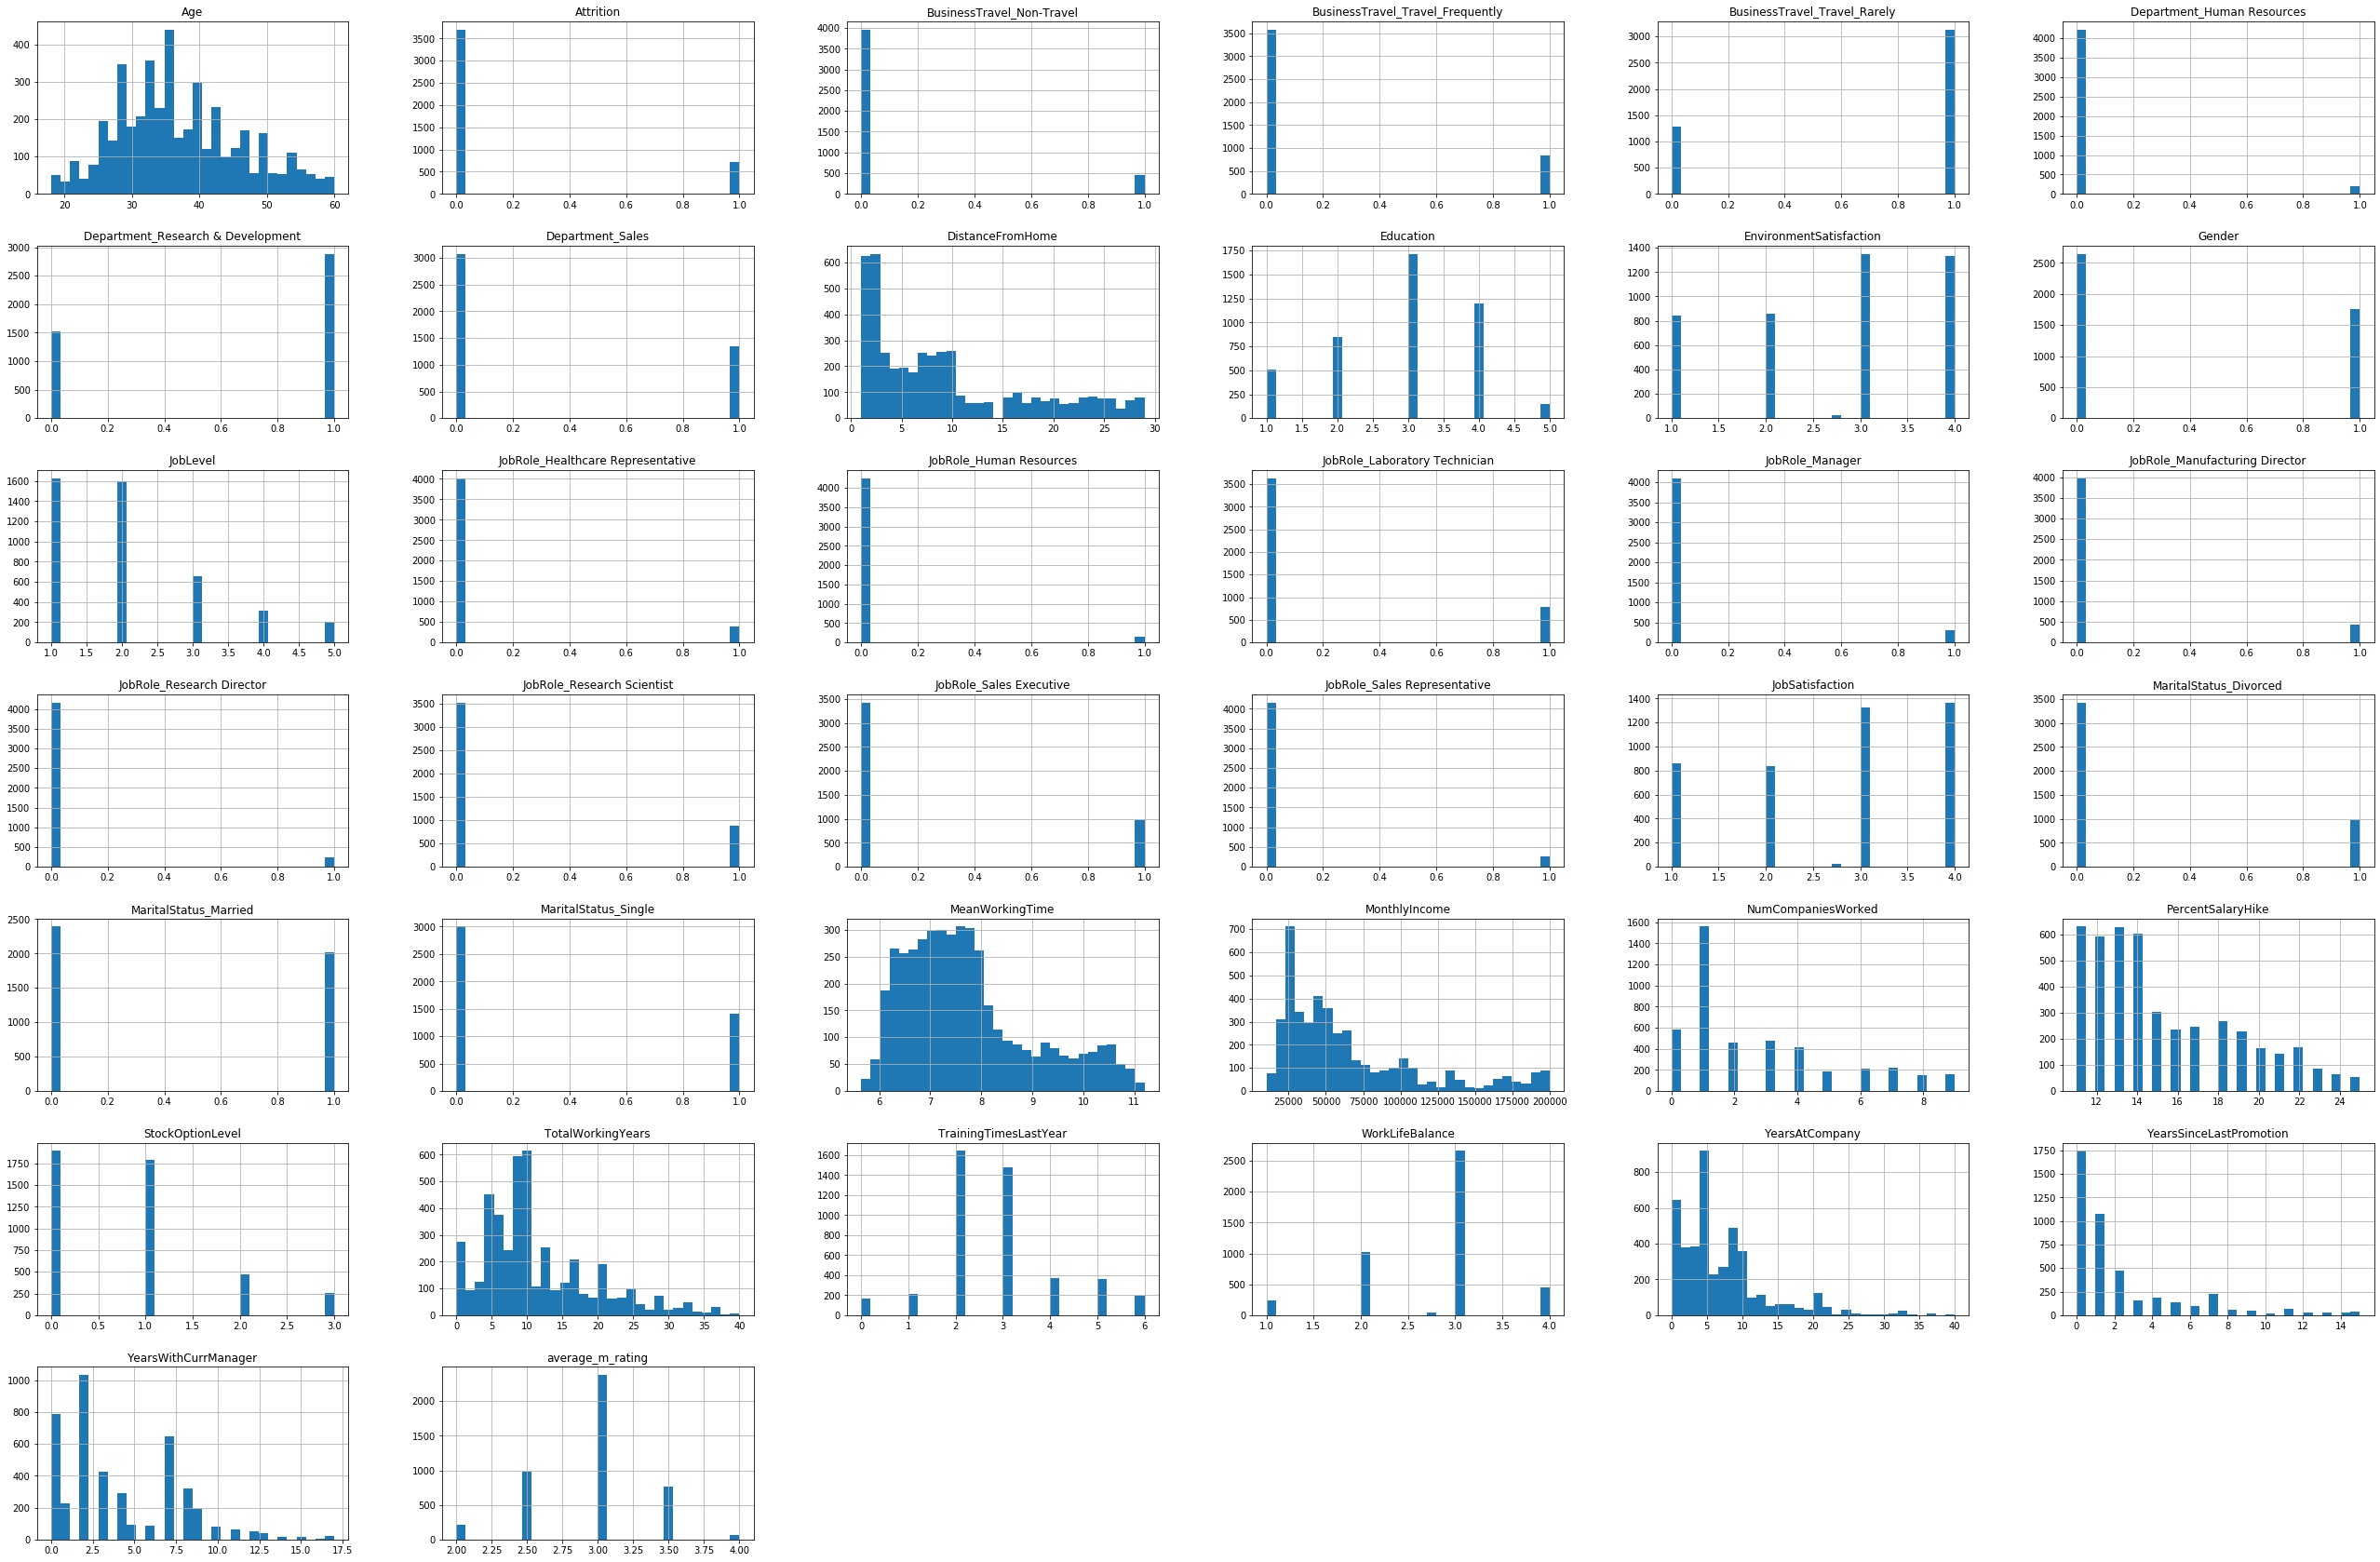

In [8]:
# Visualiser l'histogramme pour chaque feature
df.hist(bins=30, figsize=(45,30))
plt.show()

(38.5, -0.5)

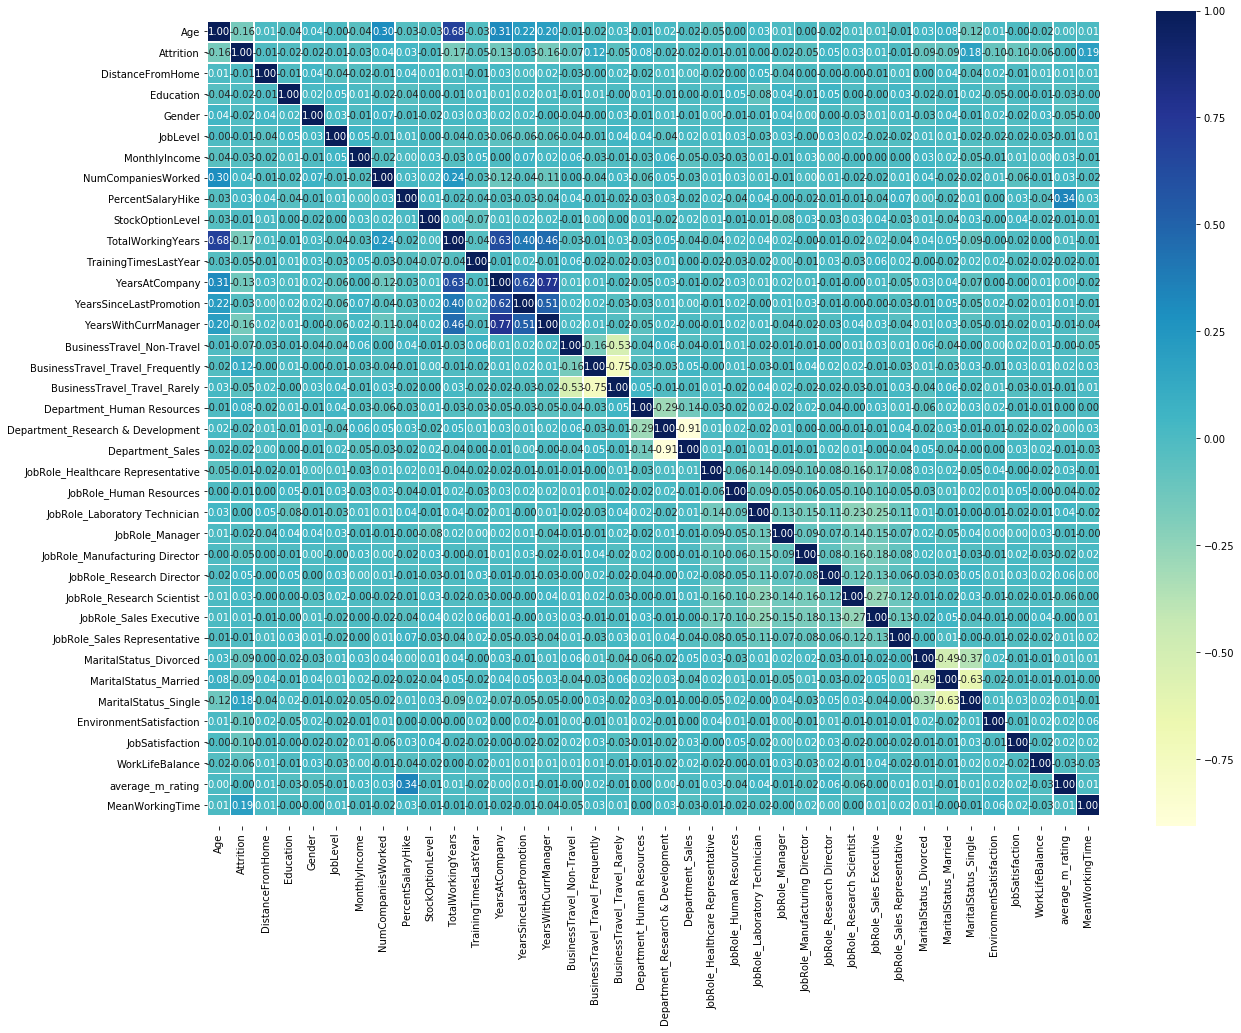

In [9]:
# Calculer et afficher la matrice de corrélation des features
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
# Retirer la classe finale du Dataset 
X = df.drop("Attrition",axis=1)
y = df["Attrition"]

In [13]:
# Normalizer les données en utilisant le z-score 
norm = StandardScaler().fit_transform(X)
X = pd.DataFrame(norm, columns=X.columns)
X

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,average_m_rating,MeanWorkingTime
0,1.541369,-0.393938,-0.891688,1.224745,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,...,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.253684,1.157584,-1.082946e+00,0.145230,-0.293348
1,-0.648668,0.099639,-1.868426,1.224745,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,...,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,0.253684,-0.662869,1.761536e+00,0.145230,0.273545
2,-0.539166,0.963398,1.061787,-0.816497,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,...,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-0.664142,-0.662869,-2.505188e+00,0.145230,-0.493970
3,0.117845,-0.887515,2.038524,-0.816497,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,...,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1.171511,1.157584,3.392950e-01,-1.103239,-0.362730
4,-0.539166,0.099639,-1.868426,-0.816497,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,...,1.873287,-0.244625,-0.534873,-0.918921,1.458650,1.171511,-1.573095,3.392950e-01,0.145230,0.220917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.555852,-0.517332,1.061787,1.224745,-0.961486,-0.100700,0.123580,0.489376,0.241988,-0.164315,...,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,1.171511,-1.573095,3.392950e-01,0.145230,0.743887
4406,-0.867672,-0.887515,1.061787,-0.816497,-0.961486,-0.812504,-0.277442,-0.057267,-0.932014,-0.164315,...,-0.533821,-0.244625,1.869602,-0.918921,-0.685565,1.171511,1.157584,3.392950e-01,-1.103239,-1.287043
4407,-1.305679,1.950552,-0.891688,-0.816497,-0.057788,-0.595138,-1.079486,1.309341,-0.932014,-0.807517,...,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-1.581969,0.247358,3.392950e-01,1.393700,0.176701
4408,0.555852,1.086793,-0.891688,-0.816497,-0.961486,-0.872210,-1.079486,-0.330589,0.241988,-0.164315,...,-0.533821,-0.244625,1.869602,-0.918921,-0.685565,1.171511,-1.573095,3.392950e-01,-1.103239,1.362968


In [14]:
seed =42
test_size = 0.2
# ==== Split entre les données d'entrainement et de test =====
# Fixer un seed pour avoir les mêmes résultats à chaque essai
np.random.seed(seed)

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)



# Étape 4: Choisir le bon estimateur/algorithme pour notre cas 
***

Maintenant que nous avons divisé nos données en ensembles d'entraînement et de test, il est temps de construire un modèle d'apprentissage automatique.

Nous allons l'entraîner (trouver les modèles) sur l'ensemble d'entraînement.

Et nous allons le tester (utiliser les modèles) sur l'ensemble de test.

Nous allons essayer 3 modèles d'apprentissage automatique différents :
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

    - Régression logistique
    - Classificateur K-Nearest Neighbours (voisins les plus proches)
    - Classificateur Random Forest


affichage du % de attrition positive du data set

In [15]:
print(percentage(y,len(y.index)))

16.122448979591837


In [16]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """ Cette fonction applique un fit et score sur chacun des modeles """
    
    # Fixer le seed 
    np.random.seed(42)
    
    # Dictionnaire pour sauvegarder les scores
    model_scores = {}
    for name, model in models.items():
        # Fit le modèle
        model.fit(X_train, y_train)
        # Evaluer le modèle selon le score de chaque algorithme
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

# Étape 5 : Test des différents modèles

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8526077097505669,
 'KNN': 0.8333333333333334,
 'Random Forest': 0.9920634920634921}

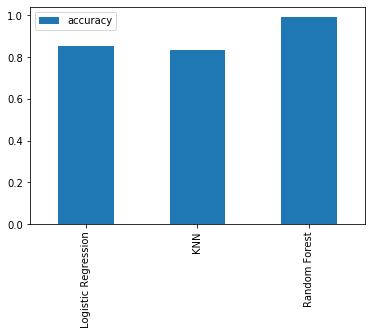

In [18]:
# Comparaison des resultats (Scores) obtenus
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Étape 6 : Évaluation des modèle

Dans cette étape nous allons test différent paramétré sur nos différents models tout en comparant leurs résultats

    Hypyterparameter tuning
    Feature importance
    Confusion matrix
    Cross-validation
    Precision
    Recall
    F1 score
    Classification report
    ROC curve
    Area under the curve (AUC)

In [19]:
# hyperparameter tuning knn
train_scores = []
test_scores = []
# list des differnt valeur pour n_neighbors
neighbors = range(1, 10)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


Maximum KNN score sur les donne de test: 99.55%


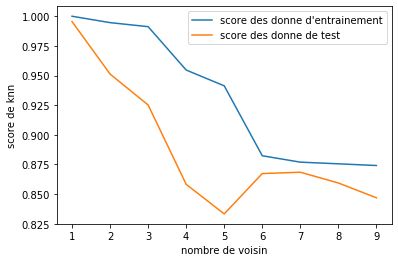

In [20]:
plt.plot(neighbors, train_scores, label="score des donne d'entrainement")
plt.plot(neighbors, test_scores, label="score des donne de test")
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("nombre de voisin")
plt.ylabel("score de knn")
plt.legend()

print(f"Maximum KNN score sur les donne de test: {max(test_scores)*100:.2f}%")

In [21]:
# Hyperparameter tuning avec RandomizedSearchCV pour Régression logistique et Classificateur Random Forest
# logisticR
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# RandomFor
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}



In [22]:
# logisticR
np.random.seed(seed)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [23]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 78.47599703514607}

In [24]:
rs_log_reg.score(X_test, y_test)


0.8537414965986394

In [25]:
# RandomFor
np.random.seed(seed)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [27]:
rs_rf.score(X_test, y_test)


0.9399092970521542

In [28]:
# hyperparameter tuning avec GridSearchCV pour logisticR

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [29]:
gs_log_reg.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [30]:
gs_log_reg.score(X_test, y_test)


0.8537414965986394

In [31]:
y_preds_gs_rf = models["Random Forest"].predict(X_test)

In [32]:
models["Random Forest"].score(X_test, y_test)

0.9920634920634921

affichage du % d'attrition predis

In [33]:
num_rows= y_preds_gs_rf.shape[0]
num_rows
print(percentage(y_preds_gs_rf,num_rows))

15.192743764172336


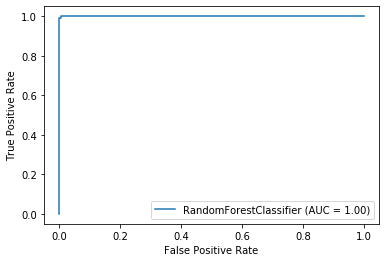

In [34]:
#Rondom forest
# graph ROC curve AUC metric
plot_roc_curve(models["Random Forest"], X_test, y_test)

In [35]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds_gs_rf))


[[741   0]
 [  7 134]]


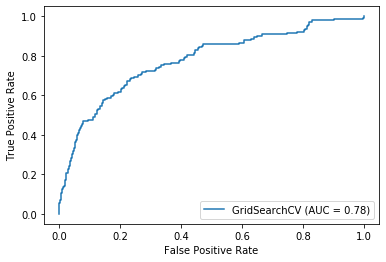

In [36]:
# logitic reg
# graph ROC curve AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [37]:
# Confusion matrix
print(confusion_matrix(y_test, gs_log_reg.predict(X_test)))


[[715  26]
 [103  38]]


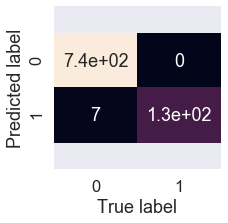

In [38]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds_gs_rf):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_gs_rf),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds_gs_rf)

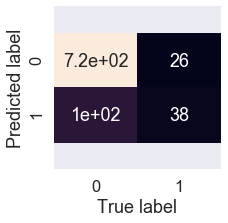

In [39]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds_gs_rf):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, gs_log_reg.predict(X_test)),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, gs_log_reg.predict(X_test))

In [40]:
print(classification_report(y_test, y_preds_gs_rf))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.95      0.97       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882



In [41]:
print(classification_report(y_test, gs_log_reg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.87      0.96      0.92       741
           1       0.59      0.27      0.37       141

    accuracy                           0.85       882
   macro avg       0.73      0.62      0.64       882
weighted avg       0.83      0.85      0.83       882



suite a se résulta nous allons poursuivre avec l'algorithme RandomForestClassifier()

In [42]:
#cross-validation pour les paramétrés nous avons garde les les paramétrés avec les qu’elle nous avons eu un score de .99
models["Random Forest"].get_params()



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
rdf = models["Random Forest"]

In [44]:
#accuracy
rdf_acc = cross_val_score(rdf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

In [45]:
#precision
rdf_precision = cross_val_score(rdf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

In [46]:
#recall
rdf_recall = cross_val_score(rdf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

In [47]:
#f1-score
rdf_f1 = cross_val_score(rdf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

In [48]:
rdf_acc ,rdf_precision,rdf_recall,rdf_f1

(array([0.99773243, 0.99886621, 0.99773243, 0.99886621, 0.99886621]),
 array([1.        , 1.        , 1.        , 1.        , 0.99305556]),
 array([0.98591549, 0.99295775, 0.99295775, 0.99295775, 1.        ]),
 array([0.98932384, 1.        , 1.        , 0.99646643, 1.        ]))

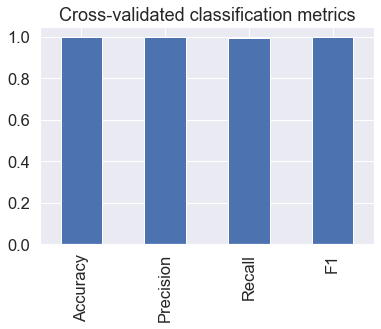

In [49]:
rdf_metrics = pd.DataFrame({"Accuracy": np.mean(rdf_acc),
                           "Precision": np.mean(rdf_precision),
                           "Recall": np.mean(rdf_recall),
                           "F1": np.mean(rdf_f1)},
                          index=[0])

rdf_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance
Notre objectif est de determiner les facteurs ayant le plus d'influence sur ce taux de turn-over (1)


In [50]:
rdf.feature_importances_

array([0.07951642, 0.04675678, 0.02804686, 0.01285486, 0.02665406,
       0.06727756, 0.04217388, 0.04417487, 0.02068736, 0.07188763,
       0.03001383, 0.05830226, 0.03349761, 0.04381181, 0.00559315,
       0.014773  , 0.00942297, 0.01028286, 0.00922466, 0.00991982,
       0.00637906, 0.00339151, 0.00760169, 0.00448843, 0.0048968 ,
       0.00819818, 0.01063286, 0.01017551, 0.00565745, 0.00921952,
       0.01119683, 0.02331087, 0.03669034, 0.03666367, 0.02821542,
       0.02751062, 0.10089899])

In [51]:
feature_dict = dict(sorted(zip(X.columns, list(rdf.feature_importances_)), reverse=True))
feature_dict

{'average_m_rating': 0.027510618889616305,
 'YearsWithCurrManager': 0.043811808061678593,
 'YearsSinceLastPromotion': 0.033497611898316904,
 'YearsAtCompany': 0.05830226131215072,
 'WorkLifeBalance': 0.028215418666802976,
 'TrainingTimesLastYear': 0.030013831987590427,
 'TotalWorkingYears': 0.07188763250461172,
 'StockOptionLevel': 0.020687362025637854,
 'PercentSalaryHike': 0.04417487443302342,
 'NumCompaniesWorked': 0.04217387603217241,
 'MonthlyIncome': 0.06727756266836284,
 'MeanWorkingTime': 0.10089898750296472,
 'MaritalStatus_Single': 0.023310870937443835,
 'MaritalStatus_Married': 0.011196831707444685,
 'MaritalStatus_Divorced': 0.009219520180943866,
 'JobSatisfaction': 0.036663672564942004,
 'JobRole_Sales Representative': 0.005657453873856498,
 'JobRole_Sales Executive': 0.010175513060866954,
 'JobRole_Research Scientist': 0.010632863611659313,
 'JobRole_Research Director': 0.008198181958948416,
 'JobRole_Manufacturing Director': 0.004896799456024814,
 'JobRole_Manager': 0.00

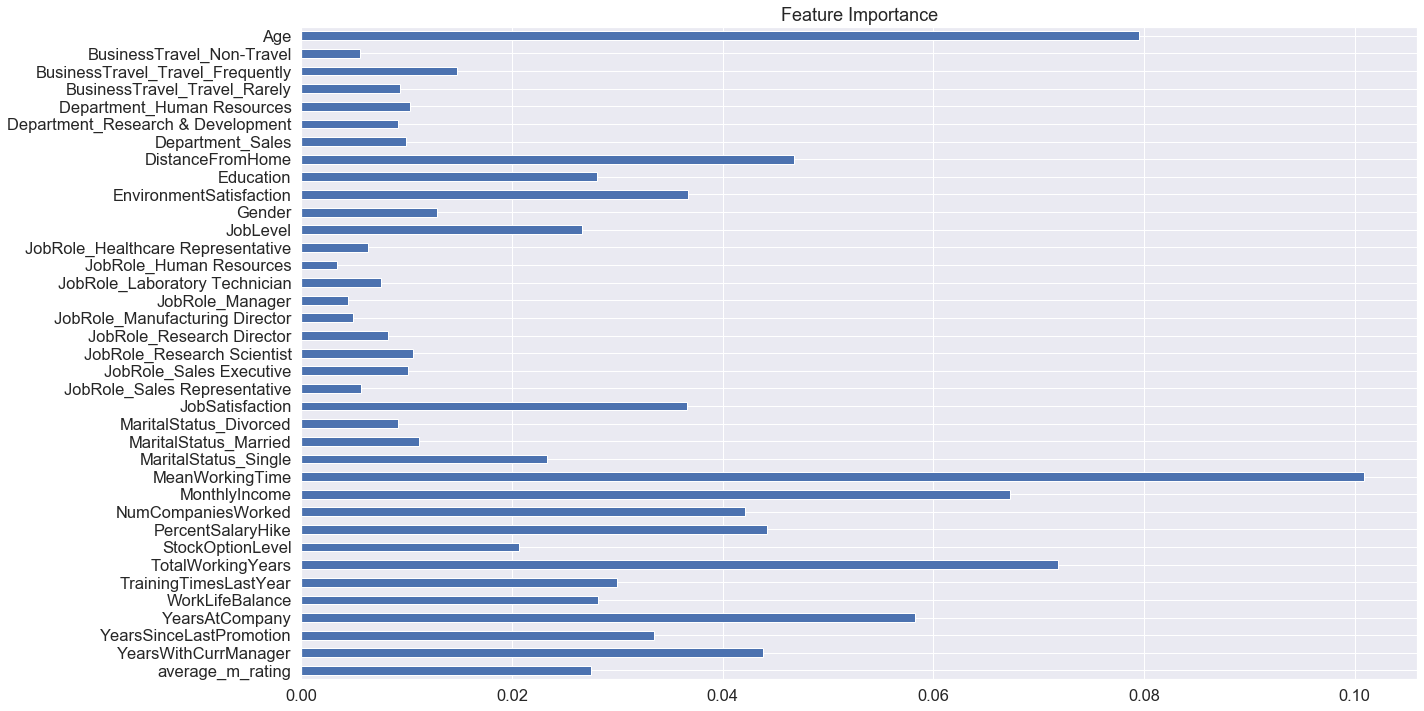

In [52]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(figsize=(20,12),title="Feature Importance", legend=False);

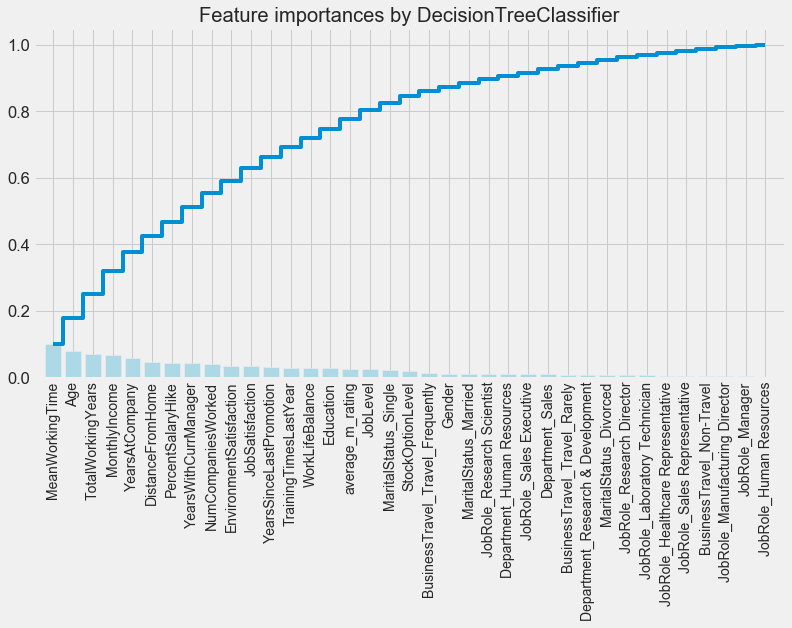

In [53]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


importances = rdf.feature_importances_
feat_names = df.drop("Attrition",axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Toujours dans l'optique d'avoir un retour sur les attribue qui influe le plus sur le taux de turn over nous avons décidé d'enlever les attribue qui en un faible impacte sur le résulta de plus les attribue qui peuvent être discriminent ou que l'entreprise ne peut affecter 

    - Analysés des features les plus importante par a port a l'attrition
    - Supprition des attribue discriminent ou que l'entreprise n'a pas d'impact sur ca variation exp (age, genre, ...)
    - Modifie la valeur des attribues et tester avec notre modele pour voire si le resuta change  

In [54]:
df.isna().sum()


Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Dir

In [55]:
# Retirer la classe finale du Dataset 
X = df.drop({
    "Attrition",
    "Age",
    "Gender",
    "JobRole_Human Resources",
    "JobRole_Laboratory Technician",
    "JobRole_Manager",
    "JobRole_Manufacturing Director",
    "JobRole_Research Director",
    "JobRole_Research Scientist",
    "JobRole_Sales Executive",
    "JobRole_Sales Representative",
    "Department_Human Resources",
    "Department_Research & Development",
    "Department_Sales",
    "MaritalStatus_Divorced",
    "MaritalStatus_Married",
    "MaritalStatus_Single",
},
    axis=1
)
y = df["Attrition"]

In [56]:
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [57]:
model_scores = fit_and_score(models,X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8401360544217688,
 'KNN': 0.8049886621315193,
 'Random Forest': 0.9852607709750567}

In [58]:
rf = models["Random Forest"]

In [59]:
y_preds_gs_rf = rf.predict(X_test)

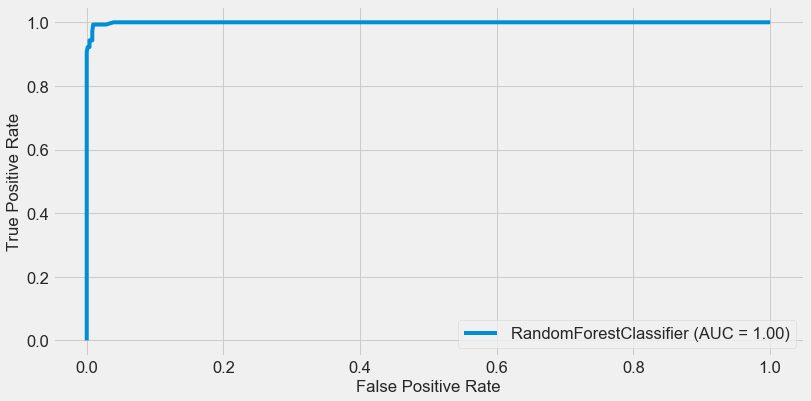

In [60]:
#Rondom forest
# graph ROC curve AUC metric
plot_roc_curve(rf, X_test, y_test)

In [61]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds_gs_rf))

[[741   0]
 [ 13 128]]


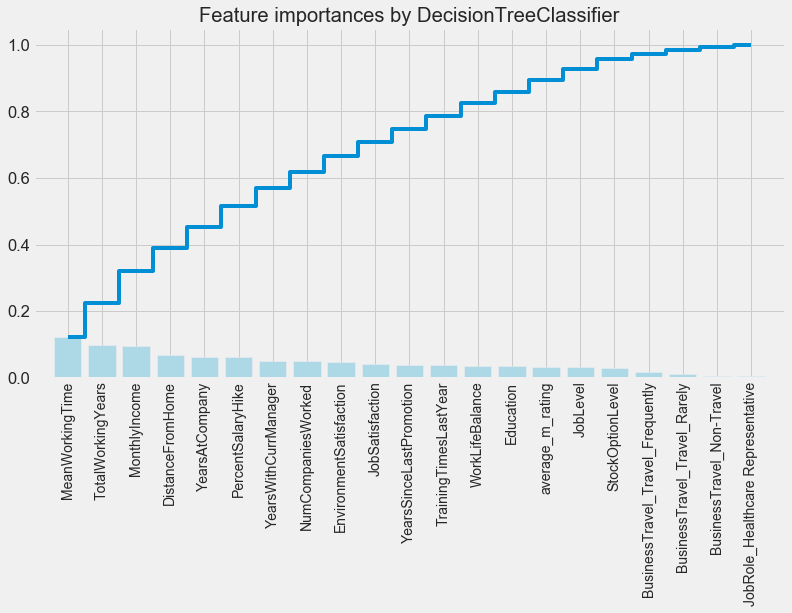

In [62]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


importances = rf.feature_importances_
feat_names = X.columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

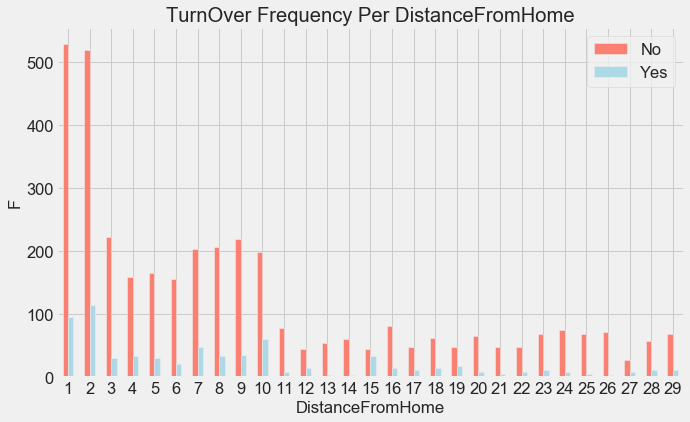

In [63]:
pd.crosstab(df["DistanceFromHome"], df.Attrition).plot(kind="bar",
                                       figsize=(10, 6),
                                       color=["salmon", "lightblue"])

# Plotter les graphes
plt.title(f"TurnOver Frequency Per DistanceFromHome")
plt.xlabel("DistanceFromHome")
plt.ylabel("F")
plt.legend(["No", "Yes"])
plt.xticks(rotation=0);

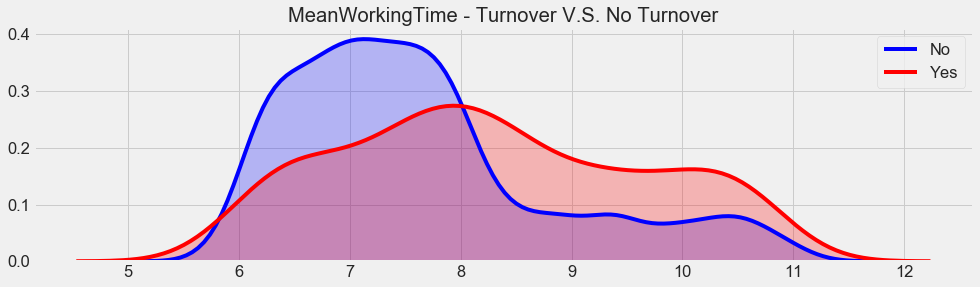

In [64]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'MeanWorkingTime'] , color='blue',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'MeanWorkingTime'] , color='red',shade=True, label='Yes')
plt.title('MeanWorkingTime - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])


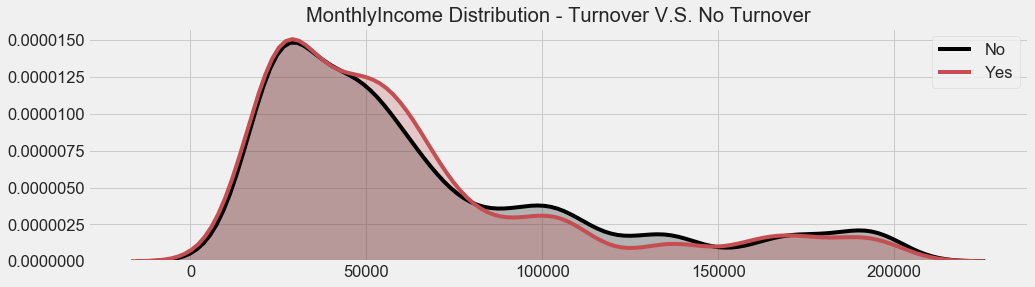

In [65]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'MonthlyIncome'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'MonthlyIncome'] , color='r',shade=True, label='Yes')
plt.title('MonthlyIncome Distribution - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

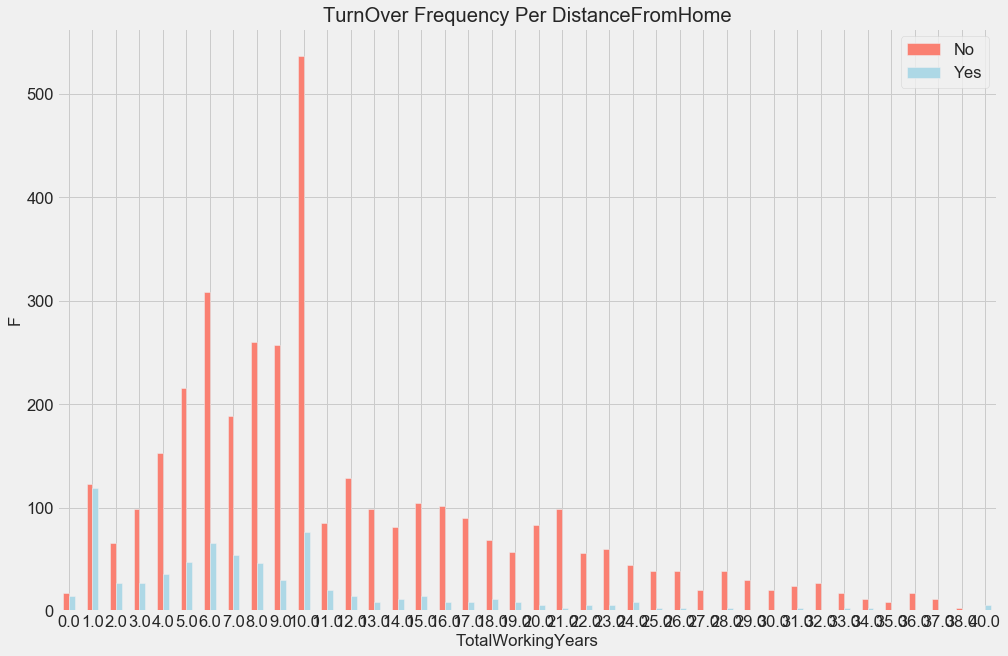

In [66]:
pd.crosstab(df["TotalWorkingYears"], df.Attrition).plot(kind="bar",
                                       figsize=(15, 10),
                                       color=["salmon", "lightblue"])

# Plotter les graphes
plt.title(f"TurnOver Frequency Per DistanceFromHome")
plt.xlabel("TotalWorkingYears")
plt.ylabel("F")
plt.legend(["No", "Yes"])
plt.xticks(rotation=0);

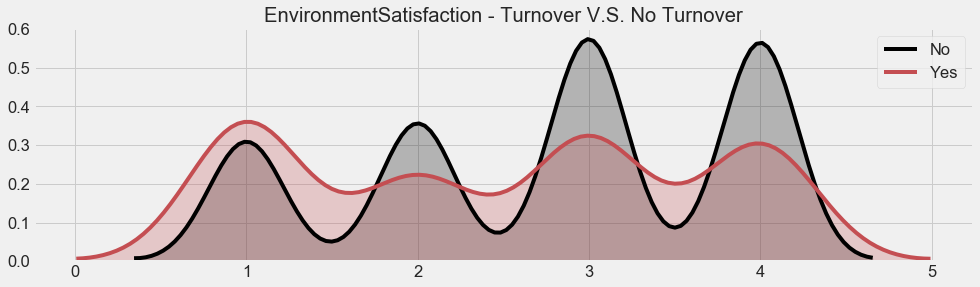

In [67]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'EnvironmentSatisfaction'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'EnvironmentSatisfaction'] , color='r',shade=True, label='Yes')
plt.title('EnvironmentSatisfaction - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])


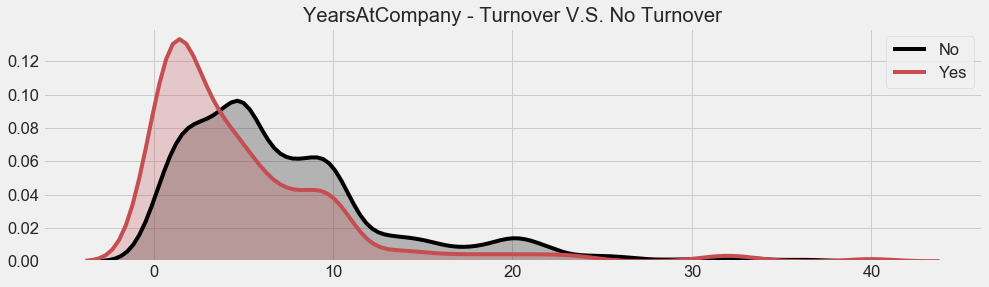

In [68]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'YearsAtCompany'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'YearsAtCompany'] , color='r',shade=True, label='Yes')
plt.title('YearsAtCompany - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

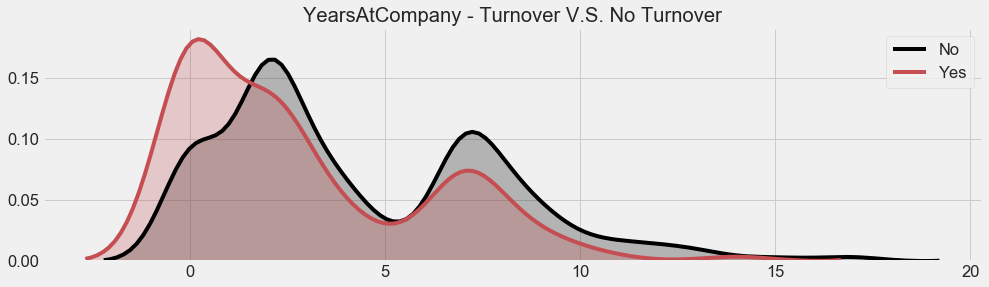

In [69]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'YearsWithCurrManager'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'YearsWithCurrManager'] , color='r',shade=True, label='Yes')
plt.title('YearsAtCompany - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

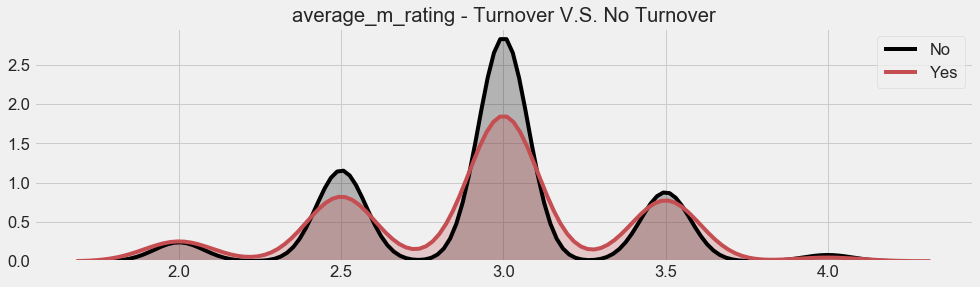

In [70]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'average_m_rating'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'average_m_rating'] , color='r',shade=True, label='Yes')
plt.title('average_m_rating - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

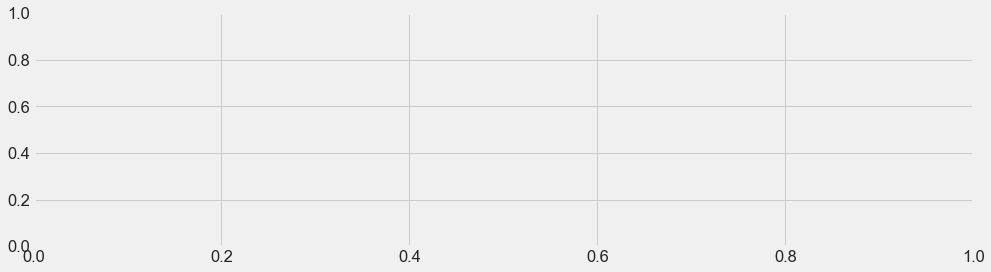

In [71]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'BusinessTravel_Travel_Frequently'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'BusinessTravel_Travel_Frequently'] , color='r',shade=True, label='Yes')
plt.title('BusinessTravel_Travel_Frequently - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

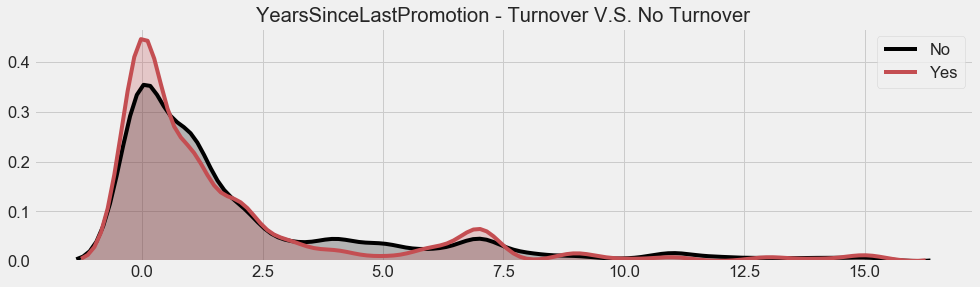

In [72]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'YearsSinceLastPromotion'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'YearsSinceLastPromotion'] , color='r',shade=True, label='Yes')
plt.title('YearsSinceLastPromotion - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])


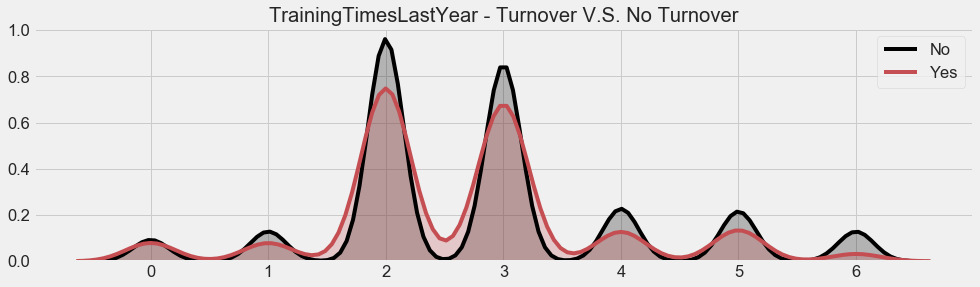

In [73]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'TrainingTimesLastYear'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'TrainingTimesLastYear'] , color='r',shade=True, label='Yes')
plt.title('TrainingTimesLastYear - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])



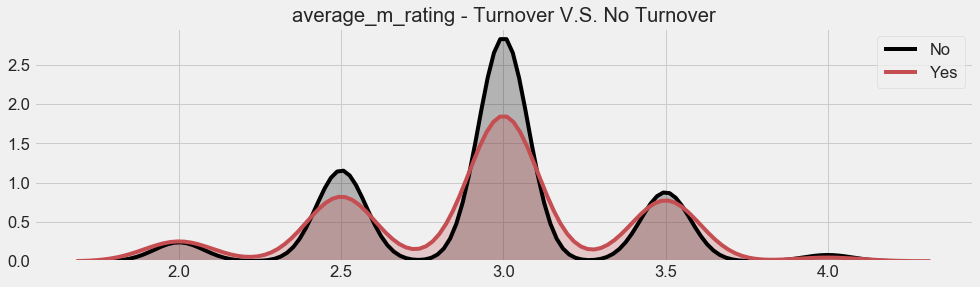

In [74]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'average_m_rating'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'average_m_rating'] , color='r',shade=True, label='Yes')
plt.title('average_m_rating - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])



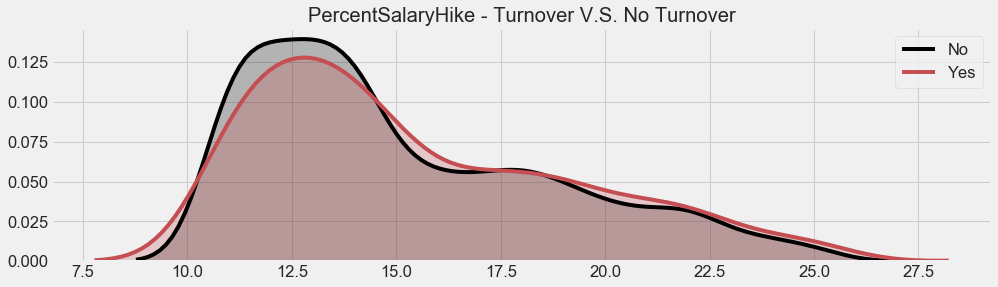

In [75]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'PercentSalaryHike'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'PercentSalaryHike'] , color='r',shade=True, label='Yes')
plt.title('PercentSalaryHike - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])


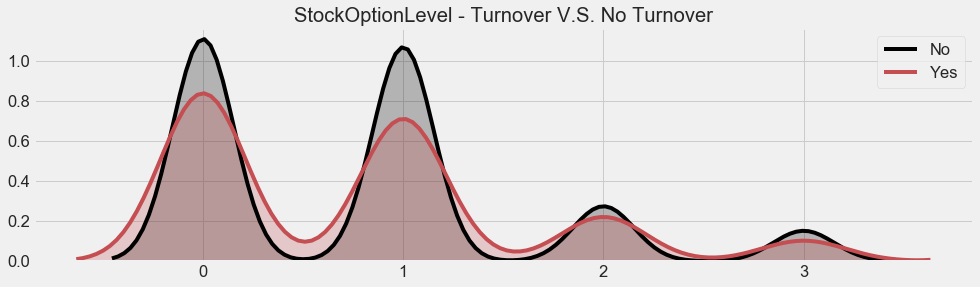

In [76]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition'] == 0),'StockOptionLevel'] , color='black',shade=True, label='No')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 1),'StockOptionLevel'] , color='r',shade=True, label='Yes')
plt.title('StockOptionLevel - Turnover V.S. No Turnover')
plt.legend(["No", "Yes"])

In [77]:
# test = np.where([df['Attrition']==1 & df["StockOptionLevel"] < 2 & df["MonthlyIncome"] < 50000], uniform(8, 9), df['MeanWorkingTime'])
test = df.query('Attrition == 1 & StockOptionLevel == 2 & MonthlyIncome < 50000')
test

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,average_m_rating,MeanWorkingTime
38,18,1,1,4,0,1,23350,1.0,14,2,...,1,0,0,0,1,3.0,3.0,3.0,2.5,6.910256
185,22,1,7,3,1,2,37850,5.0,13,2,...,0,0,0,0,1,3.0,3.0,3.0,3.0,6.465483
199,18,1,2,3,0,1,34680,1.0,18,2,...,1,0,0,0,1,2.0,2.0,3.0,3.5,9.191101
504,26,1,2,3,0,2,48210,6.0,14,2,...,0,0,0,1,0,1.0,1.0,3.0,3.0,8.498622
655,45,1,12,3,0,2,43060,2.0,11,2,...,0,0,0,0,1,1.0,2.0,3.0,3.0,9.922703
708,58,1,1,4,0,2,10090,7.0,13,2,...,1,0,0,1,0,3.0,1.0,2.0,3.5,8.621104
774,39,1,2,4,0,2,43810,2.0,15,2,...,0,0,0,0,1,1.0,1.0,4.0,2.5,9.401346
913,40,1,16,4,0,1,36330,3.0,16,2,...,0,0,0,0,1,1.0,1.0,1.0,3.0,10.267325
1080,30,1,12,4,1,2,49500,1.0,12,2,...,1,0,0,0,1,2.0,4.0,2.0,3.0,7.495020
1417,29,1,10,2,1,2,15550,1.0,19,2,...,0,0,0,1,0,2.0,4.0,2.0,3.0,6.626111


In [78]:
from random import uniform

df['EnvironmentSatisfaction'] = np.where(df['Attrition']==1, uniform(2, 3), df['EnvironmentSatisfaction'])
df['MeanWorkingTime'] = np.where(df['Attrition']==1, uniform(8, 9), df['MeanWorkingTime'])

In [79]:
df

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,average_m_rating,MeanWorkingTime
0,51,0,6,2,1,1,131160,1.0,11,0,...,0,0,0,1,0,3.000000,4.0,2.000000,3.0,7.363301
1,31,1,10,1,1,1,41890,0.0,23,1,...,0,0,0,0,1,2.269864,2.0,4.000000,3.0,8.587787
2,32,0,17,4,0,4,193280,1.0,15,3,...,1,0,0,1,0,2.000000,2.0,1.000000,3.0,7.110486
3,38,0,2,5,0,3,83210,3.0,11,3,...,0,0,0,1,0,4.000000,4.0,3.000000,2.5,7.275869
4,32,0,10,1,0,1,23420,4.0,12,2,...,1,0,0,0,1,4.000000,1.0,3.000000,3.0,8.011352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,5,4,1,1,60290,3.0,17,1,...,0,0,0,0,1,4.000000,1.0,3.000000,3.0,8.670373
4406,29,0,2,4,0,1,26790,2.0,15,0,...,0,0,1,0,0,4.000000,4.0,3.000000,2.5,6.111096
4407,25,0,25,2,0,2,37020,0.0,20,0,...,1,0,0,1,0,1.000000,3.0,3.000000,3.5,7.955633
4408,42,0,18,2,0,1,23980,0.0,14,1,...,0,0,1,0,0,4.000000,1.0,3.000000,2.5,9.450508


In [80]:
X = df.drop(    {"Attrition",
    "Age",
    "Gender",
    "JobRole_Human Resources",
    "JobRole_Laboratory Technician",
    "JobRole_Manager",
    "JobRole_Manufacturing Director",
    "JobRole_Research Director",
    "JobRole_Research Scientist",
    "JobRole_Sales Executive",
    "JobRole_Sales Representative",
    "Department_Human Resources",
    "Department_Research & Development",
    "Department_Sales",
    "MaritalStatus_Divorced",
    "MaritalStatus_Married",
    "MaritalStatus_Single",
},axis=1)
y = df["Attrition"]


y_preds_gs_rf = models["Random Forest"].predict(X)


In [81]:
print(classification_report(y, y_preds_gs_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3699
           1       1.00      0.73      0.84       711

    accuracy                           0.96      4410
   macro avg       0.98      0.86      0.91      4410
weighted avg       0.96      0.96      0.95      4410



Affichage du % d'attrition predis avec des attribues modifie

In [82]:
num_rows= y_preds_gs_rf.shape[0]
num_rows
print(percentage(y_preds_gs_rf,num_rows))

11.746031746031745


In [83]:
# Confusion matrix
print(confusion_matrix(y, y_preds_gs_rf))


[[3699    0]
 [ 193  518]]


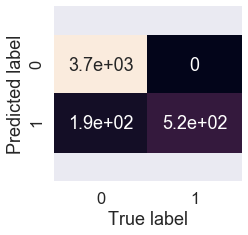

In [84]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds_gs_rf):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_gs_rf),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y, y_preds_gs_rf)
